In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1.讀入MNIST數據

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train0, y_train0),(x_test0, y_test0) = mnist.load_data()

# 2.格式整理

## 輸入數據

In [5]:
x_train = x_train0.reshape(x_train0.shape[0], x_train0.shape[1], x_train0.shape[2], 1)
x_test = x_test0.reshape(x_test0.shape[0], x_test0.shape[1], x_test0.shape[2], 1)

# 歸一化
x_train = x_train-x_train.min()
x_train = x_train/x_train.max()
x_test = x_test-x_test.min()
x_test = x_test/x_test.max()
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

# 確認格式
print(x_train[100].shape)
print(x_test[100].shape)

0.0 1.0
0.0 1.0
(28, 28, 1)
(28, 28, 1)


## 輸出數據

In [6]:
from keras.utils import np_utils

In [7]:
y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

# 確認數據
y_train[100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# 3.建構CNN

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

## 建立 model_0 ( convolution block 層數= 2)

* 老師上課說一般神經網路convolution須大於等於3，因此嘗試若convolution個數只有2的情況

In [9]:
model_0 = Sequential()

In [10]:
# 第一次convolution
model_0.add(Conv2D(4, (5, 5), padding='same', input_shape=(28, 28, 1)))
model_0.add(Activation('relu'))

model_0.add(MaxPool2D(pool_size=(2, 2)))

# 第二次convolution
model_0.add(Conv2D(8, (5, 5), padding='same'))
model_0.add(Activation('relu'))

model_0.add(MaxPool2D(pool_size=(2, 2)))

# 送進 NN (為了拉平)
model_0.add(Flatten())
model_0.add(Dense(9))
model_0.add(Activation('relu'))

# output
model_0.add(Dense(10))
model_0.add(Activation('softmax'))

In [11]:
model_0.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [12]:
model_0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 392)               0         
__________

In [13]:
X0 = model_0.fit(x_train, y_train, batch_size=100, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0882 - acc: 0.2003
Epoch 2/50
60000/60000 [==============================] - 37s 614us/step - loss: 0.0672 - acc: 0.4849
Epoch 3/50
60000/60000 [==============================] - 35s 585us/step - loss: 0.0339 - acc: 0.77100s - loss: 0.0340 - acc: 0.
Epoch 4/50
60000/60000 [==============================] - 36s 596us/step - loss: 0.0213 - acc: 0.86164s - loss: 0.0216 - acc: 0.859 - E
Epoch 5/50
60000/60000 [==============================] - 35s 589us/step - loss: 0.0160 - acc: 0.8967
Epoch 6/50
60000/60000 [==============================] - 36s 594us/step - loss: 0.0133 - acc: 0.91453s - loss:  - ET
Epoch 7/50
60000/60000 [==============================] - 36s 599us/step - loss: 0.0114 - acc: 0.9255
Epoch 8/50
60000/60000 [==============================] - 36s 608us/step - loss: 0.0102 - acc: 0.9341
Epoch 9/50
60000/60000 [==============================] - 36s 606us/step - loss: 0.0092 - acc: 0.9412
Epoch 1

## 建立 model_1 ( convolution block層數 = 3)

In [14]:
model_1 = Sequential()

In [15]:
# 第一次convolution
model_1.add(Conv2D(4, (5, 5), padding='same', input_shape=(28, 28, 1)))
model_1.add(Activation('relu'))

model_1.add(MaxPool2D(pool_size=(2, 2)))

# 第二次convolution
model_1.add(Conv2D(8, (5, 5), padding='same'))
model_1.add(Activation('relu'))

model_1.add(MaxPool2D(pool_size=(2, 2)))

# 第三次convolution
model_1.add(Conv2D(16, (5, 5), padding='same'))
model_1.add(Activation('relu'))

model_1.add(MaxPool2D(pool_size=(2, 2)))

# 送進 NN (為了拉平)
model_1.add(Flatten())
model_1.add(Dense(9))
model_1.add(Activation('relu'))

# output
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

In [16]:
model_1.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [17]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
activation_6 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 16)          3216      
__________

In [18]:
X1 = model_1.fit(x_train, y_train, batch_size=100, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 41s 677us/step - loss: 0.0896 - acc: 0.1022
Epoch 2/50
60000/60000 [==============================] - 40s 673us/step - loss: 0.0874 - acc: 0.1619
Epoch 3/50
60000/60000 [==============================] - 40s 675us/step - loss: 0.0749 - acc: 0.3929
Epoch 4/50
60000/60000 [==============================] - 41s 676us/step - loss: 0.0462 - acc: 0.6679
Epoch 5/50
60000/60000 [==============================] - 40s 675us/step - loss: 0.0236 - acc: 0.8450
Epoch 6/50
60000/60000 [==============================] - 41s 676us/step - loss: 0.0172 - acc: 0.8868
Epoch 7/50
60000/60000 [==============================] - 40s 674us/step - loss: 0.0143 - acc: 0.9072
Epoch 8/50
60000/60000 [==============================] - 40s 674us/step - loss: 0.0124 - acc: 0.9189
Epoch 9/50
60000/60000 [==============================] - 41s 675us/step - loss: 0.0109 - acc: 0.9287
Epoch 10/50
60000/60000 [==============================] - 40s 674us/step - loss: 

## 建立 model_2 ( convolution block層數 = 4)

In [19]:
model_2 = Sequential()

In [20]:
# 第一次convolution
model_2.add(Conv2D(4, (5, 5), padding='same', input_shape=(28, 28, 1)))
model_2.add(Activation('relu'))

model_2.add(MaxPool2D(pool_size=(2, 2)))

# 第二次convolution
model_2.add(Conv2D(8, (5, 5), padding='same'))
model_2.add(Activation('relu'))

model_2.add(MaxPool2D(pool_size=(2, 2)))

# 第三次convolution
model_2.add(Conv2D(16, (5, 5), padding='same'))
model_2.add(Activation('relu'))

model_2.add(MaxPool2D(pool_size=(2, 2)))

# 第四次convolution
model_2.add(Conv2D(32, (5, 5), padding='same'))
model_2.add(Activation('relu'))

model_2.add(MaxPool2D(pool_size=(2, 2)))


# 送進 NN (為了拉平)
model_2.add(Flatten())
model_2.add(Dense(9))
model_2.add(Activation('relu'))

# output
model_2.add(Dense(10))
model_2.add(Activation('softmax'))

In [21]:
model_2.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [22]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
activation_10 (Activation)   (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
activation_11 (Activation)   (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 16)          3216      
__________

In [23]:
X2 = model_2.fit(x_train, y_train, batch_size=100, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 43s 721us/step - loss: 0.0898 - acc: 0.1109
Epoch 2/50
60000/60000 [==============================] - 43s 719us/step - loss: 0.0891 - acc: 0.1447
Epoch 3/50
60000/60000 [==============================] - 43s 720us/step - loss: 0.0862 - acc: 0.2324
Epoch 4/50
60000/60000 [==============================] - 45s 749us/step - loss: 0.0731 - acc: 0.4168
Epoch 5/50
60000/60000 [==============================] - 43s 720us/step - loss: 0.0501 - acc: 0.6055
Epoch 6/50
60000/60000 [==============================] - 43s 718us/step - loss: 0.0294 - acc: 0.7933
Epoch 7/50
60000/60000 [==============================] - 43s 720us/step - loss: 0.0164 - acc: 0.8922
Epoch 8/50
60000/60000 [==============================] - 43s 724us/step - loss: 0.0123 - acc: 0.9197
Epoch 9/50
60000/60000 [==============================] - 43s 722us/step - loss: 0.0103 - acc: 0.9333
Epoch 10/50
60000/60000 [==============================] - 43s 724us/step - loss: 

# 畫圖比較 accuracy

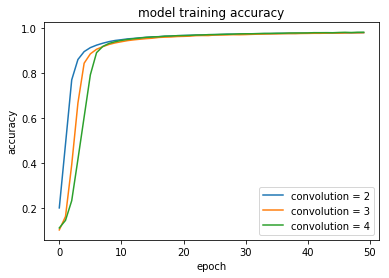

In [24]:
plt.plot(X0.history["acc"])
plt.plot(X1.history["acc"])
plt.plot(X2.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["convolution = 2", "convolution = 3", "convolution = 4"], loc = "best")
plt.show()

# 心得

* 雖然老師上課說一般的神經網路的 convolution block層數需大於等於 3 ，但由結果可看到在同樣 50 個 epoch 雖然 convolution block 層數 = 2 的正確率並不比其他 convolution block 層數較大的情況低，依然有 95% 以上。
* 由結果可以看到 convoltion block 層數越多時，對正確率的影響並不大(至少在此題目下)。